In [1]:
import sys

from sklearn.compose import make_column_selector, make_column_transformer, ColumnTransformer

sys.path.append('../')

In [2]:
from utils.data import download_housing_data

BASE_URL = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_URL = BASE_URL + "datasets/housing/housing.tgz"

download_housing_data(housing_url=HOUSING_URL)

In [3]:
from utils.data import load_housing_data

housing = load_housing_data()
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [6]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

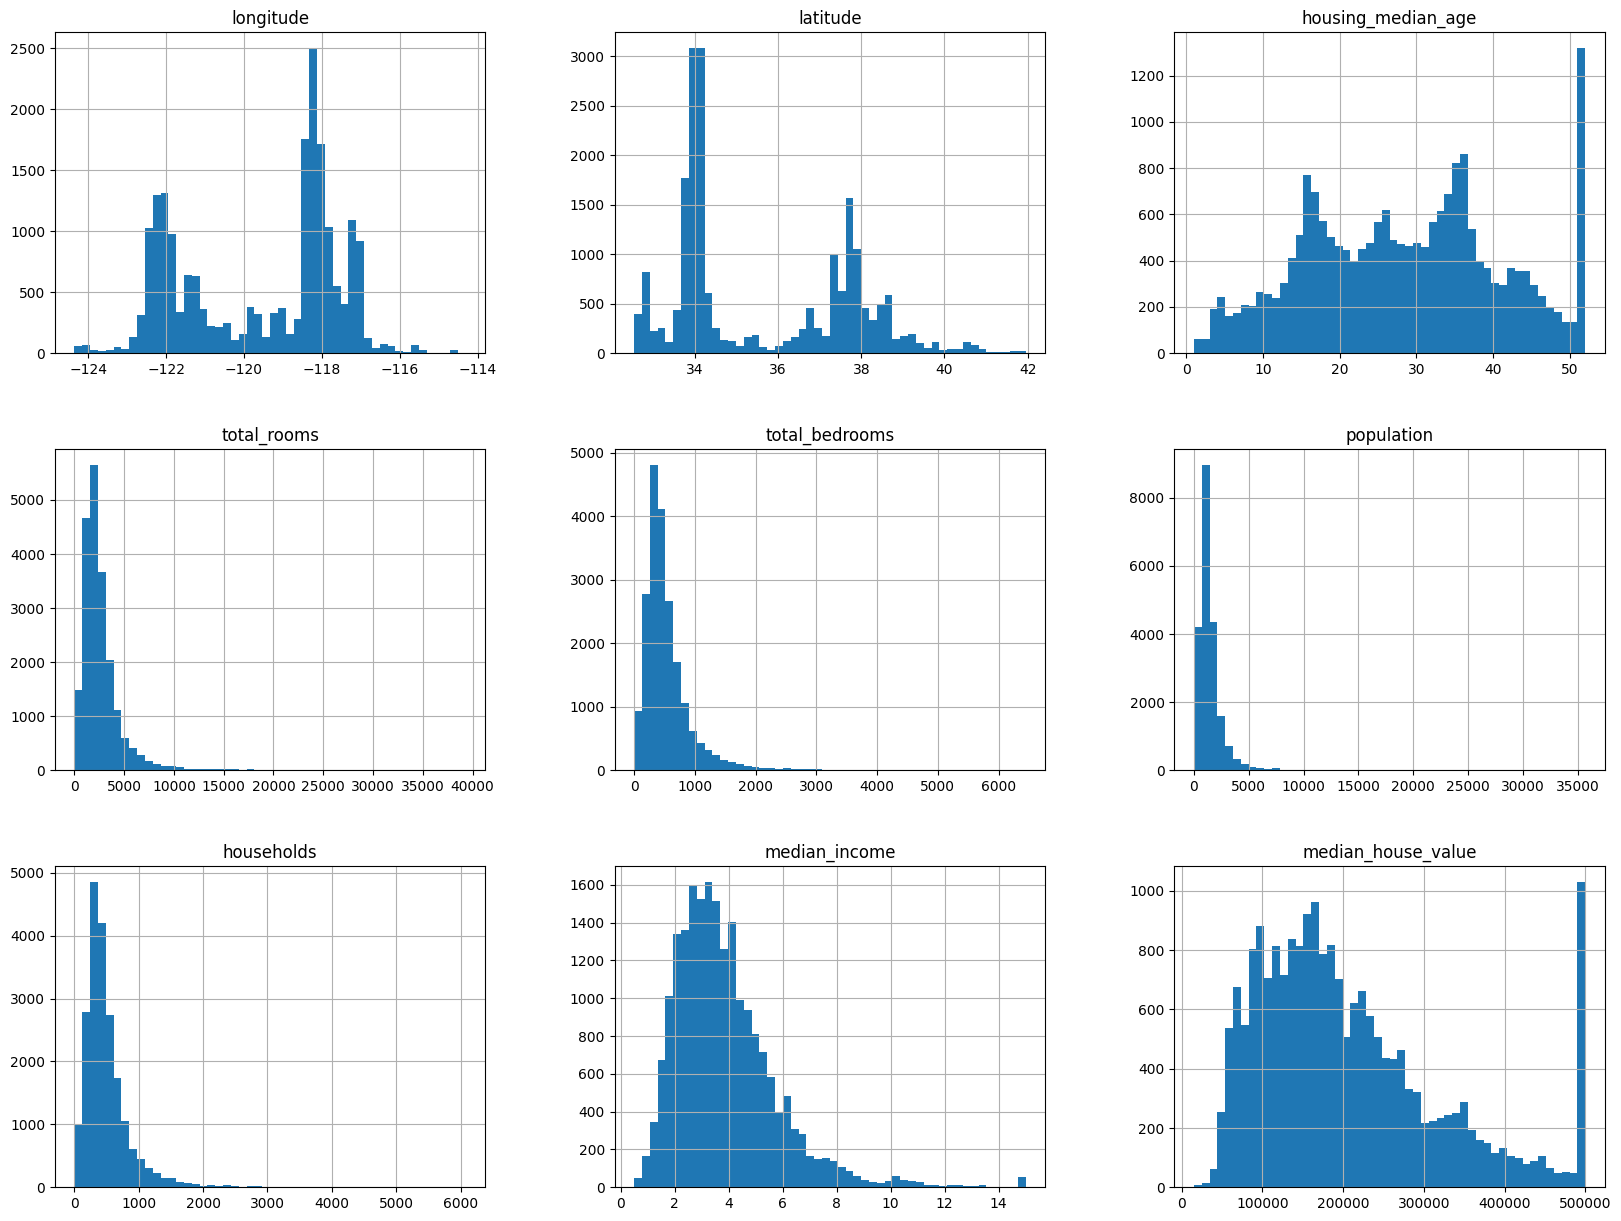

In [7]:
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(20, 15))
plt.show()

### Split Training and Test Datasets

In [8]:
from utils.data import split_train_test
from utils.data import split_train_test_by_id

# Using 20% of the dataset for testing
train_set, test_set = split_train_test(housing, 0.2)
print("train set:", len(train_set))
print("test set:", len(test_set))

housing_with_id = housing.reset_index()
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")
print(f"new train set ({len(train_set)}):\n", train_set.head())

train set: 16512
test set: 4128
new train set (16512):
    index  longitude  latitude  housing_median_age  total_rooms  \
0      0    -122.23     37.88                41.0        880.0   
1      1    -122.22     37.86                21.0       7099.0   
3      3    -122.25     37.85                52.0       1274.0   
4      4    -122.25     37.85                52.0       1627.0   
6      6    -122.25     37.84                52.0       2535.0   

   total_bedrooms  population  households  median_income  median_house_value  \
0           129.0       322.0       126.0         8.3252            452600.0   
1          1106.0      2401.0      1138.0         8.3014            358500.0   
3           235.0       558.0       219.0         5.6431            341300.0   
4           280.0       565.0       259.0         3.8462            342200.0   
6           489.0      1094.0       514.0         3.6591            299200.0   

  ocean_proximity  
0        NEAR BAY  
1        NEAR BAY  
3     

### Classify Income Categories

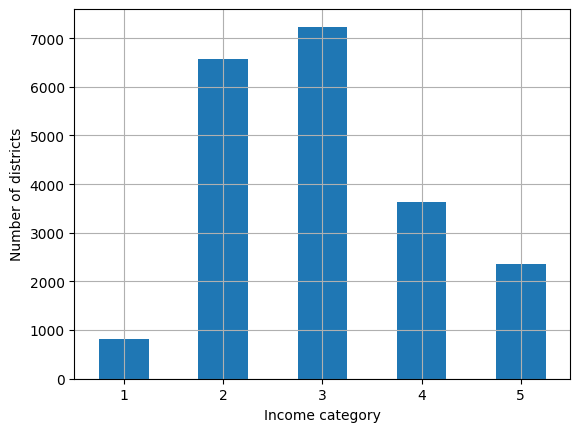

In [9]:
import pandas as pd
import numpy as np

housing["income_cat"] = pd.cut(housing["median_income"], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])

housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

### Stratified Sampling

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
strat_splits = []

for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])


In [11]:
from sklearn.model_selection import train_test_split

# Stratified sampling from SK, test size is 20%
strat_train_set, strat_test_set = train_test_split(
    housing,
    test_size=0.2,
    stratify=housing["income_cat"],
    random_state=42
)

In [12]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [13]:
for dataset in (strat_train_set, strat_test_set):
    dataset.drop("income_cat", axis=1, inplace=True)

### Data Visualization

<Axes: xlabel='longitude', ylabel='latitude'>

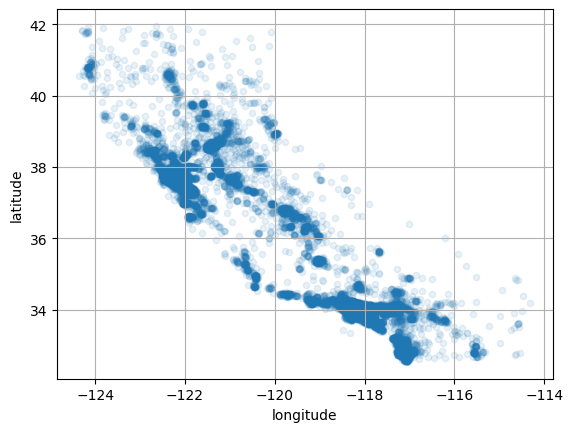

In [14]:
housing = strat_train_set.copy()
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1, grid=True)

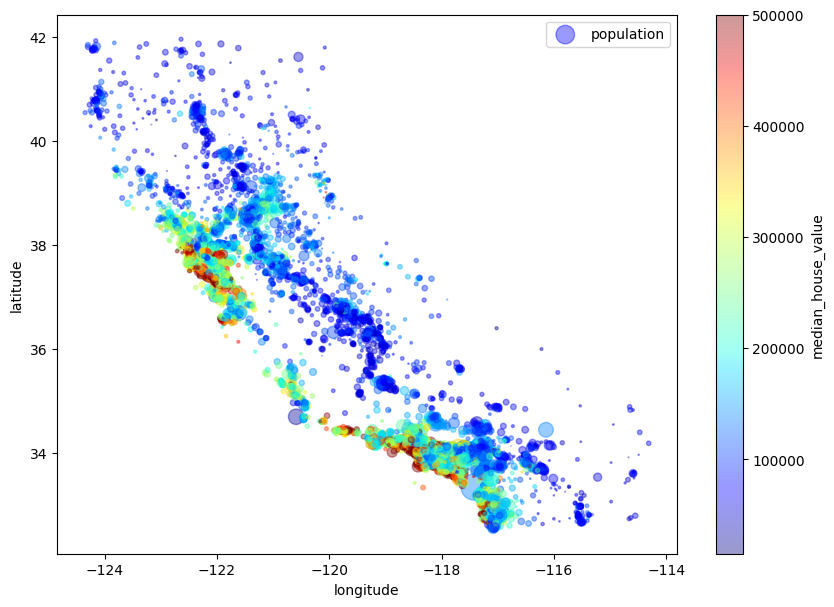

In [15]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=housing["population"] / 100, label="population",
             figsize=(10, 7), c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)

plt.legend()

### Correlations

In [16]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

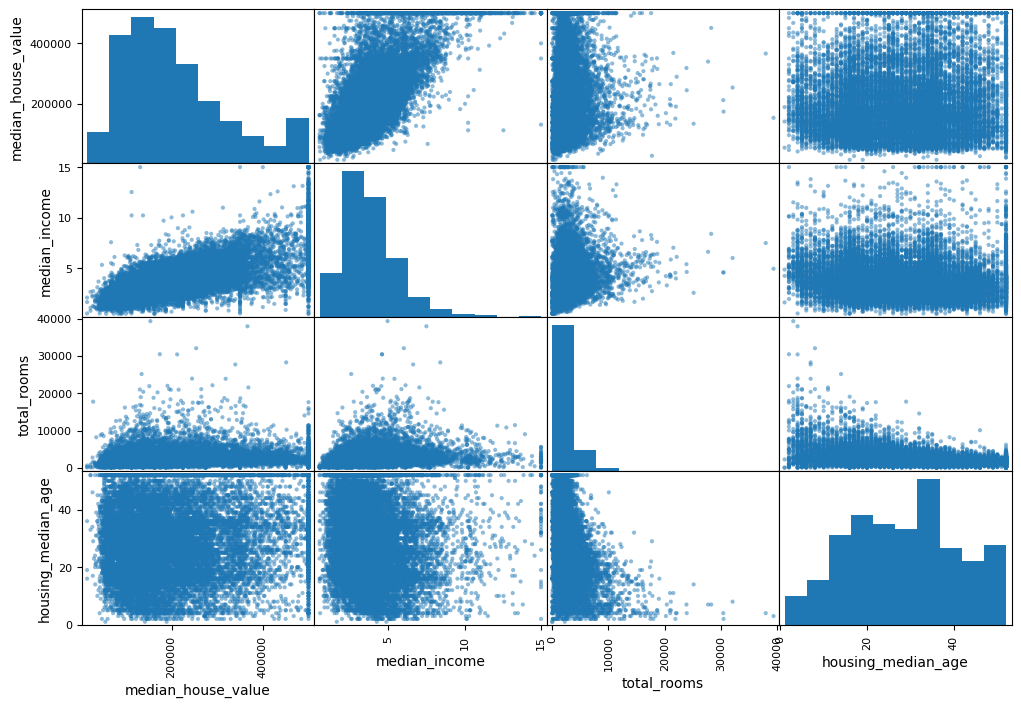

In [17]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

<Axes: xlabel='median_income', ylabel='median_house_value'>

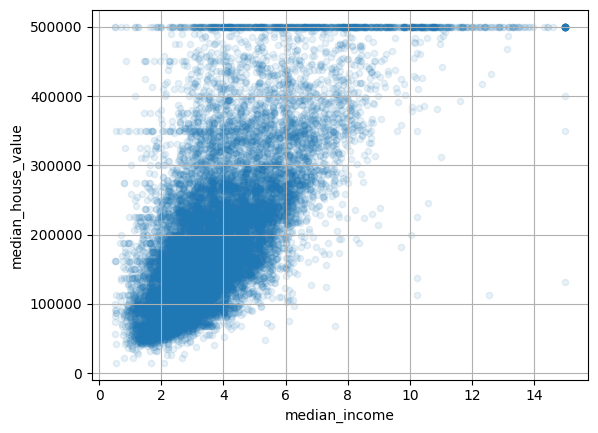

In [18]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1, grid=True)

In [19]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

In [20]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
rooms_per_house       0.146255
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
people_per_house     -0.021991
population           -0.026882
longitude            -0.047466
latitude             -0.142673
bedrooms_ratio       -0.259952
Name: median_house_value, dtype: float64

In [21]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [22]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

housing_num = housing.select_dtypes(include=[np.number])

imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [23]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [24]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [25]:
X = imputer.transform(housing_num)

In [26]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(8)

ocean_proximity
12655          INLAND
15502      NEAR OCEAN
2908           INLAND
14053      NEAR OCEAN
20496       <1H OCEAN
1481         NEAR BAY
18125       <1H OCEAN
5830        <1H OCEAN

In [27]:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

housing_cat_encoded[:8]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.]])

In [28]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [29]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

housing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

In [30]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [31]:
# Transformation Pipelines

In [32]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

In [33]:
from sklearn import set_config

set_config(display="diagram")


In [34]:
housing_num_prepared = num_pipeline.fit_transform(housing_num)
housing_num_prepared[:2].round(2)

array([[-0.94,  1.35,  0.03,  0.58,  0.64,  0.73,  0.56, -0.89],
       [ 1.17, -1.19, -1.72,  1.26,  0.78,  0.53,  0.72,  1.29]])

## Preprocessing

In [35]:
cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore")
)

In [36]:
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)

## Experimentation Complete: We'll write some scripts to apply the preprocessing

In [37]:
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin


class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, n_init=10,
                              random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)

    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

In [38]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer


def column_ratio(X):
    return X[:, [0]] / X[:, [1]]


def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]


def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler(),
    )


log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler()
)

cluster_siml = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
default_num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

preprocessing = ColumnTransformer(
    [
        ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
        ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
        ("people_per_house", ratio_pipeline(), ["population", "households"]),
        ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population", "households", "median_income"]),
        ("geo", cluster_siml, ["latitude", "longitude"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include=object))
    ],
    remainder=default_num_pipeline
)

housing_prepared = preprocessing.fit_transform(housing)
housing_prepared.shape

(16512, 24)

In [39]:
preprocessing.get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__Cluster 0 similarity',
       'geo__Cluster 1 similarity', 'geo__Cluster 2 similarity',
       'geo__Cluster 3 similarity', 'geo__Cluster 4 similarity',
       'geo__Cluster 5 similarity', 'geo__Cluster 6 similarity',
       'geo__Cluster 7 similarity', 'geo__Cluster 8 similarity',
       'geo__Cluster 9 similarity', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__housing_median_age'], dtype=object)

### Training a Simple Linear Regression Model

In [40]:
from sklearn.linear_model import LinearRegression

linear_regression_pipeline = make_pipeline(preprocessing, LinearRegression())
linear_regression_pipeline.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x781...
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7819c7e46fc0>)])),
                ('linearregression', LinearRegression())])

### Prediction Time

In [46]:
housing_predictions = linear_regression_pipeline.predict(housing)
housing_predictions[:5].round(-2) # interested in accuracy to the nearest hundred

array([ 70700., 288200., 186000., 189700., 270700.])

In [49]:
housing_labels.iloc[:5].values

array([ 72100., 279600.,  82700., 112500., 238300.])

### Evaluating Model Performance

In [ ]:
from sklearn.metrics import root_mean_squared_error

lin_RMSE = root_mean_squared_error(housing_labels, housing_predictions)
# 69239.95619019044
# this is not a good value, we have model under fitting here
# one possible reason is because linear regression isn't powerful enough
print("Linear Regression RMSE:")
lin_RMSE

Linear Regression RMSE:


69239.95619019044

### Using Decision Trees

Now, we're going to try using a more powerful model, the decision tree regressor.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Preparing tree regressor
tree_reg_pl = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg_pl.fit(housing, housing_labels)

# Making predictions
tree_reg_predictions = tree_reg_pl.predict(housing)

# Let's look at the RMSE
tree_reg_RMSE = root_mean_squared_error(housing_labels, tree_reg_predictions)
# I got 0.0, which is obviously means the model has overfitted the data (badly)
print("Decision Tree Regressor RMSE:")
tree_reg_RMSE

Decision Tree Regressor RMSE:


0.0

### Using Cross Validation Scoring

In [ ]:
from sklearn.model_selection import cross_val_score

tree_RMSEs = -cross_val_score(tree_reg_pl, housing, housing_labels, scoring="neg_root_mean_squared_error", cv=10)

# the output tells me there's an overfitting error because the training error is low (zero even)
# but the validation error is high
print("Root Mean Squared Error from K-Fold Cross Validation")
pd.Series(tree_RMSEs).describe()

Root Mean Squared Error from K-Fold Cross Validation


count       10.000000
mean     67222.995977
std       3918.520742
min      58898.978399
25%      65673.581208
50%      67195.125565
75%      69494.553444
max      73180.532285
dtype: float64

### Using Random Forests

Random forests are ensemble of decision trees.

In [63]:
from sklearn.ensemble import RandomForestRegressor

# Apparently 42 is a running joke in the ML community from the Hitchhiker's guide to the universe
RANDOM_STATE = 42
CROSS_FOLDS = 5
SCORING_CRITERIA = "neg_root_mean_squared_error"

# Preprocessing pipeline with Random Forest, and then training
forest_reg_pl = make_pipeline(preprocessing, RandomForestRegressor(random_state=RANDOM_STATE))
# argument order is features first, then labels
forest_reg_pl.fit(housing, housing_labels)

# Making predictions and then checking K-Fold cross validation scores
forest_reg_pl.predict(housing)

forest_RMSEs = -cross_val_score(forest_reg_pl, housing, housing_labels, scoring=SCORING_CRITERIA, cv=CROSS_FOLDS)
print("Random Forest RMSE scores:")
pd.Series(forest_RMSEs).describe()

Random Forest RMSE scores:


count       10.000000
mean     47196.080803
std       2518.953159
min      43480.358064
25%      45295.803304
50%      47347.433859
75%      48761.308355
max      51158.799732
dtype: float64

So it seems Random Forests is the way to go, we've gotten a much better mean and standard deviation.

### Hyperparameter tuning: Grid Search

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

training_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=RANDOM_STATE))
])

grid_search_params = [
    {
        "preprocessing__geo__n_clusters": [5, 8, 10],
        "random_forest__max_features": [4, 6, 8],
    },
    {
        "preprocessing__geo__n_clusters": [10, 15],
        "random_forest__max_features": [6, 8, 10],
    }
]

grid_search = GridSearchCV(training_pipeline, grid_search_params, cv=3, scoring=SCORING_CRITERIA)
grid_search.fit(housing, housing_labels)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<f...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7819c7e46fc0>)])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'preprocessing__geo__n_clusters': [5, 8, 10],
                          'random_forest__max_features': [4, 6, 8]},
                         {'preprocessing__geo__n_clusters': [10, 15],
                          'random_forest__max_features': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

In [70]:
grid_search.best_params_

{'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 6}

In [72]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
12      11.151917      0.672091         0.181653        0.002890   
6        7.310709      0.202186         0.196134        0.015784   
13      13.997478      0.176959         0.176414        0.009172   
9        9.957083      0.283581         0.189764        0.018074   
7       10.076582      0.240114         0.189785        0.014890   

    param_preprocessing__geo__n_clusters  param_random_forest__max_features  \
12                                    15                                  6   
6                                     10                                  4   
13                                    15                                  8   
9                                     10                                  6   
7                                     10                                  6   

                                               params  split0_test_score  \
12  {'preprocessing__geo__n_clusters': 15, 'random...      -42841.092308   
6   {'preprocessing__geo__n_clusters': 10, 'random...      -43584.491070   
13  {'preprocessing__geo__n_clusters': 15, 'random...      -43665.507479   
9   {'preprocessing__geo__n_clusters': 10, 'random...      -44112.113955   
7   {'preprocessing__geo__n_clusters': 10, 'random...      -44112.113955   

    split1_test_score  split2_test_score  mean_test_score  std_test_score  \
12      -44286.939181      -44960.067579    -44029.366356      884.033133   
6       -44459.923019      -45403.659829    -44482.691306      742.847019   
13      -44474.867271      -45582.794892    -44574.389881      785.886471   
9       -44886.873728      -45890.107614    -44963.031766      727.857769   
7       -44886.873728      -45890.107614    -44963.031766      727.857769   

    rank_test_score  
12                1  
6                 2  
13                3  
9                 4  
7                 4

Yet another step-up in accuracy.

### Randomized Search